In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

Imported needed libraries

In [82]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Read the csv file

In [83]:
data.shape

(158, 12)

In [84]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As per the describtion, dataset is fine 

In [85]:
new_column_names = {'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score','Standard Error':'Standard_Error','Economy (GDP per Capita)':'Economy_GDP_per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Dystopia Residual':'Dystopia_Residual'}
data.rename(columns=new_column_names, inplace=True)

changing the column name for our convenient

In [86]:
y=data['Happiness_Score']
x=data.drop(columns=['Happiness_Score'])

In [87]:
x

,Country,Region,Happiness_Rank,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Seperated column target

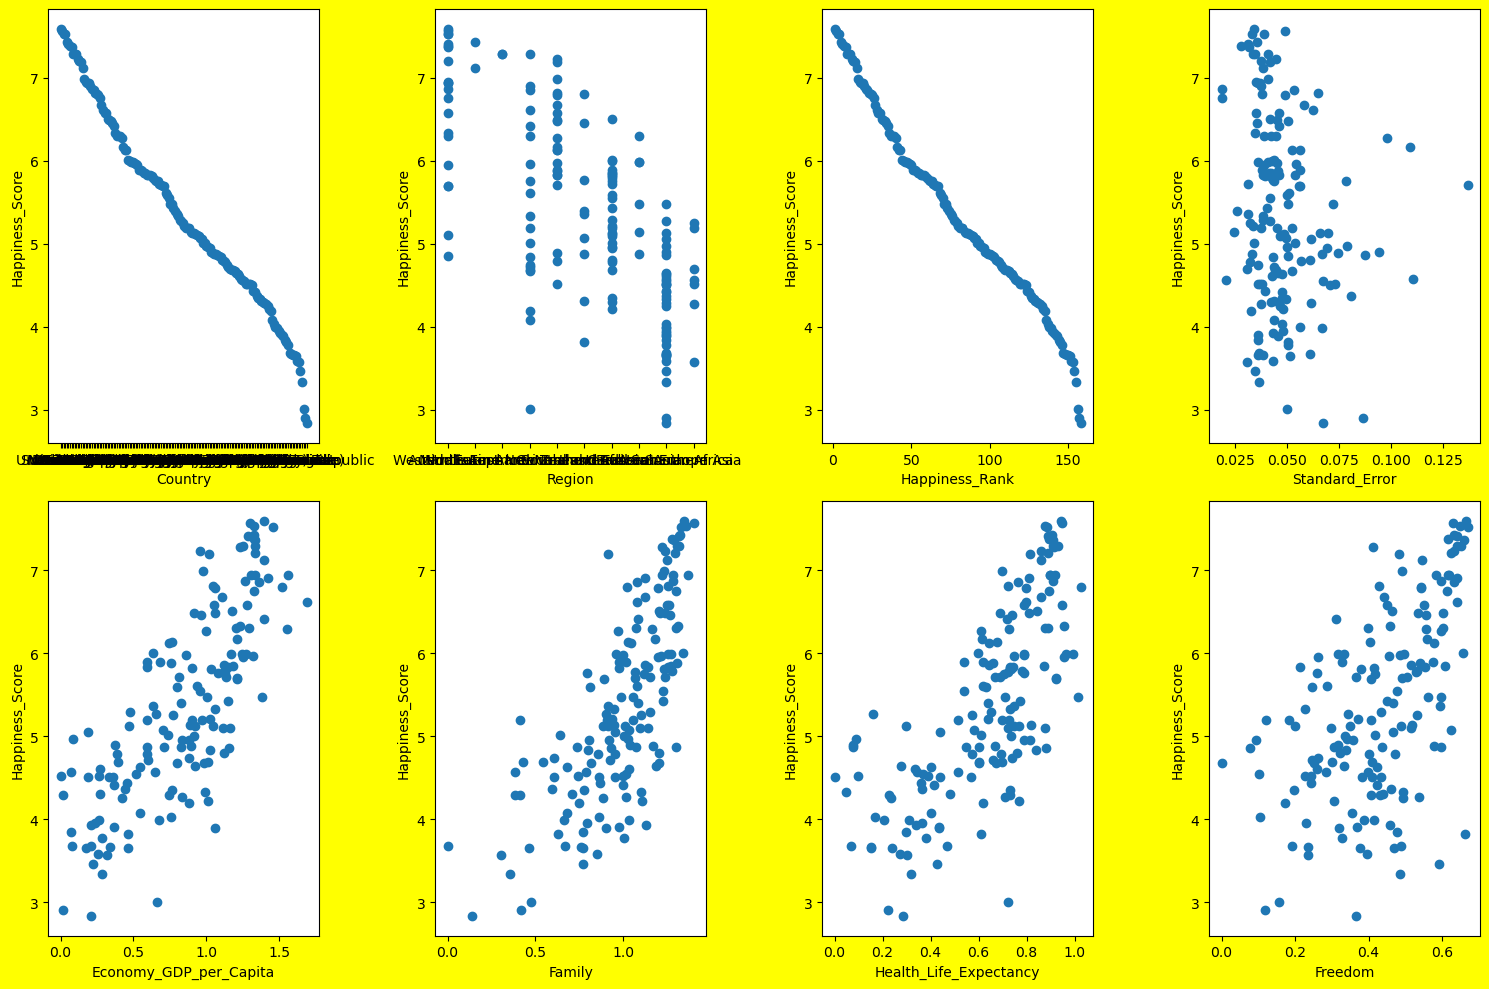

In [88]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness_Score',fontsize=10)
    plotnumber+=1
plt.tight_layout()

After visualising target vs feature, Standard error has no effet on target 

In [89]:
x=x.drop(columns=['Standard_Error','Country','Region'])


removed unwanted columns

In [90]:
x

,Happiness_Rank,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,154,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


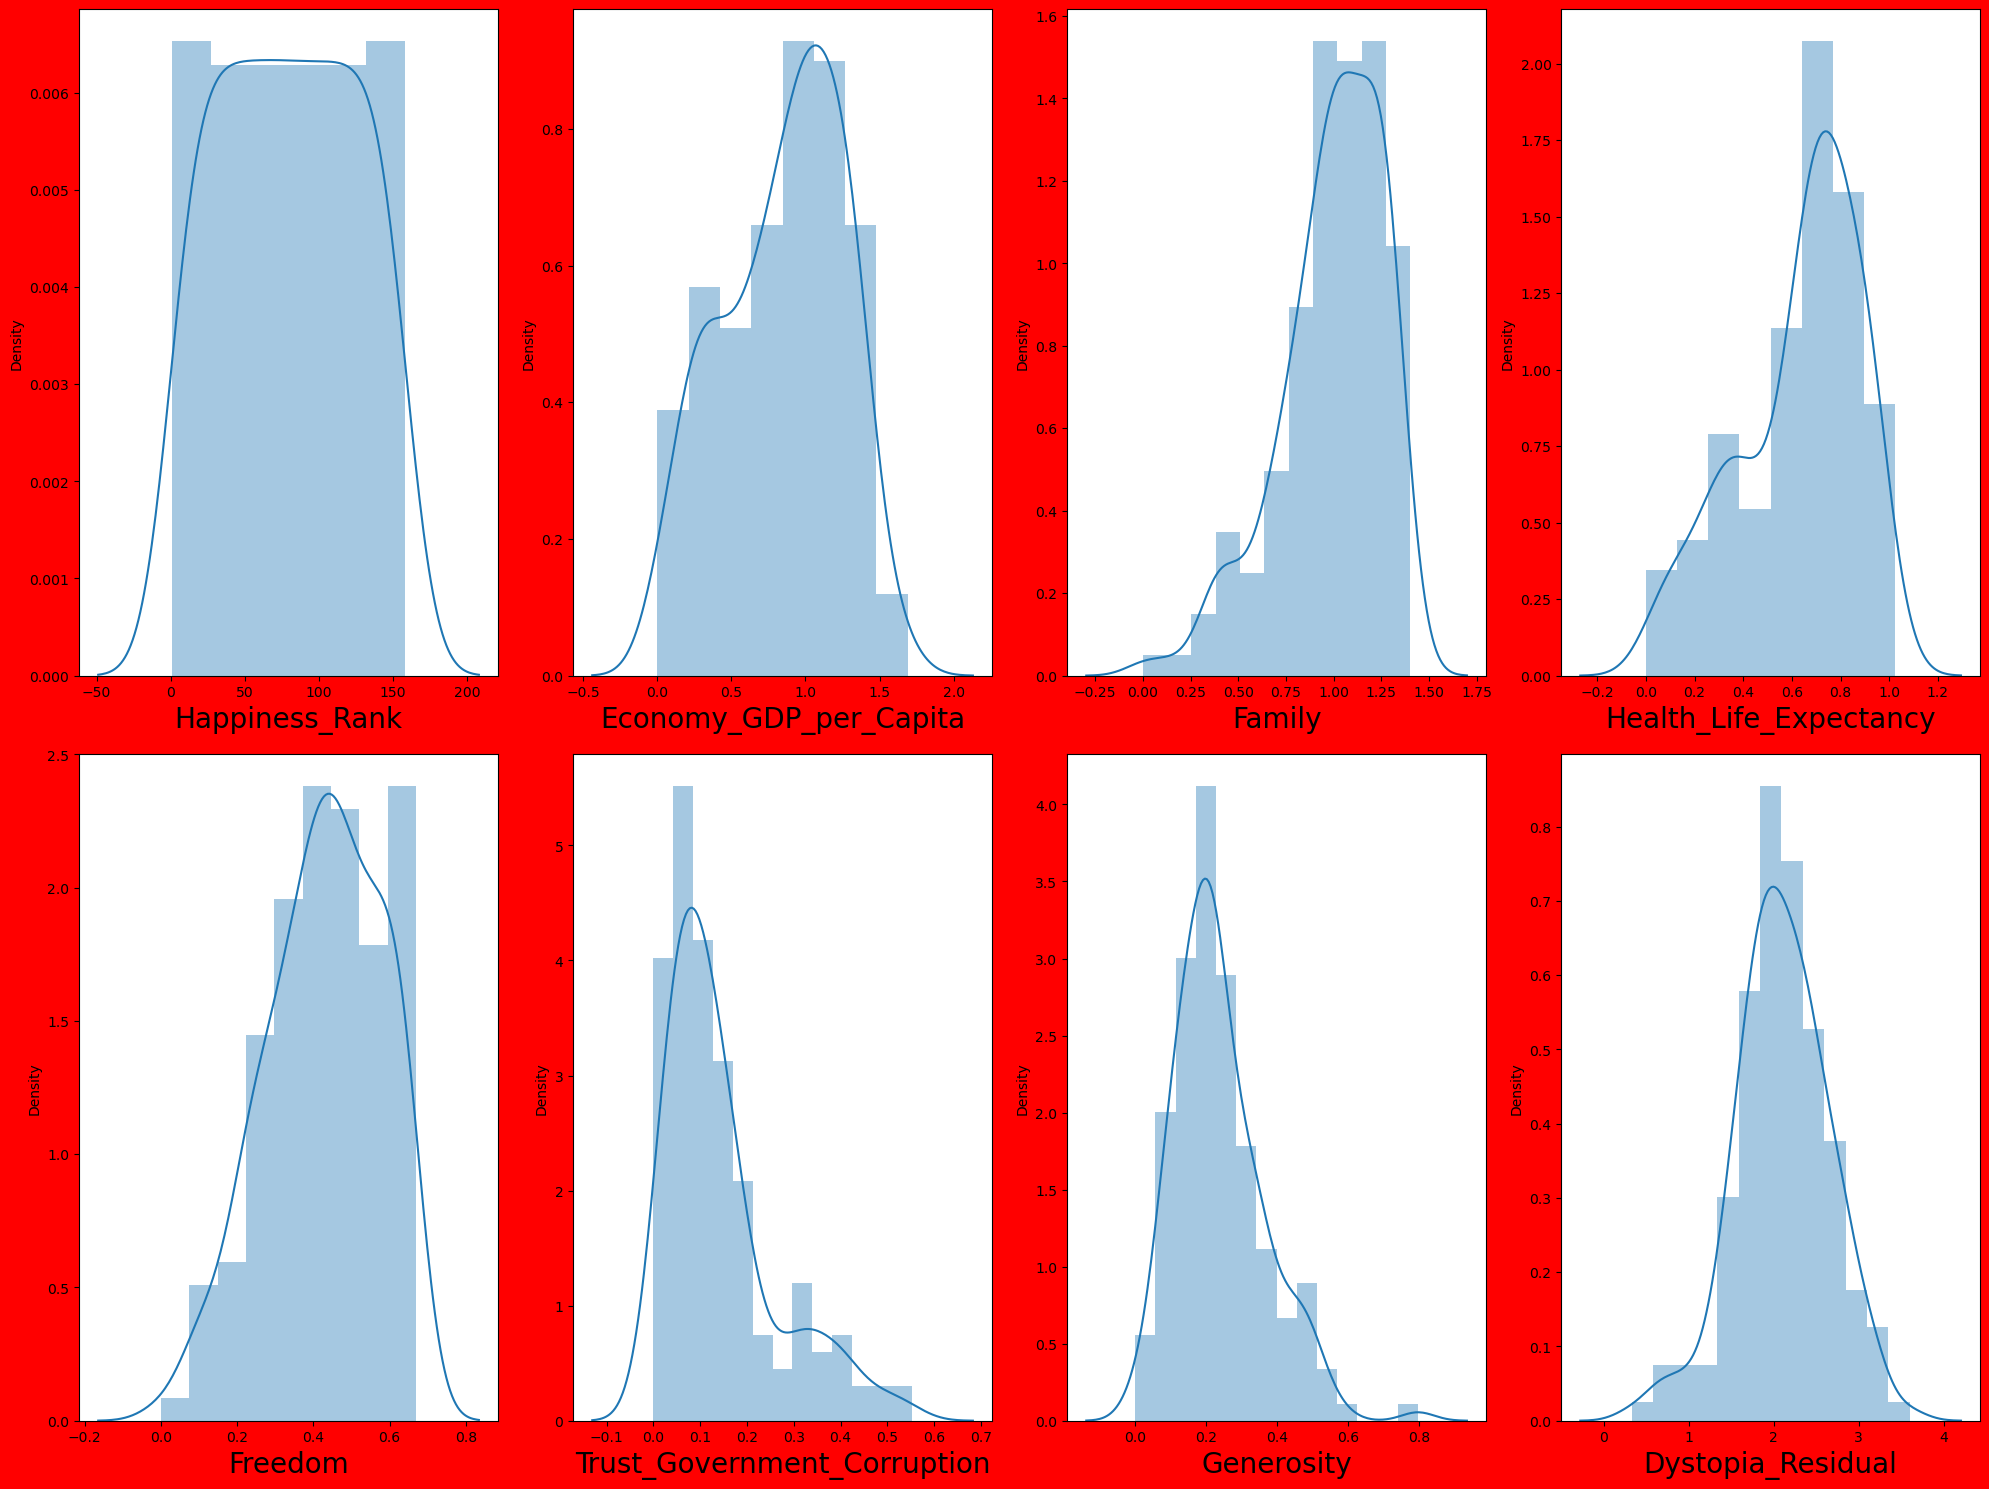

In [91]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in x.columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

All features looks fine

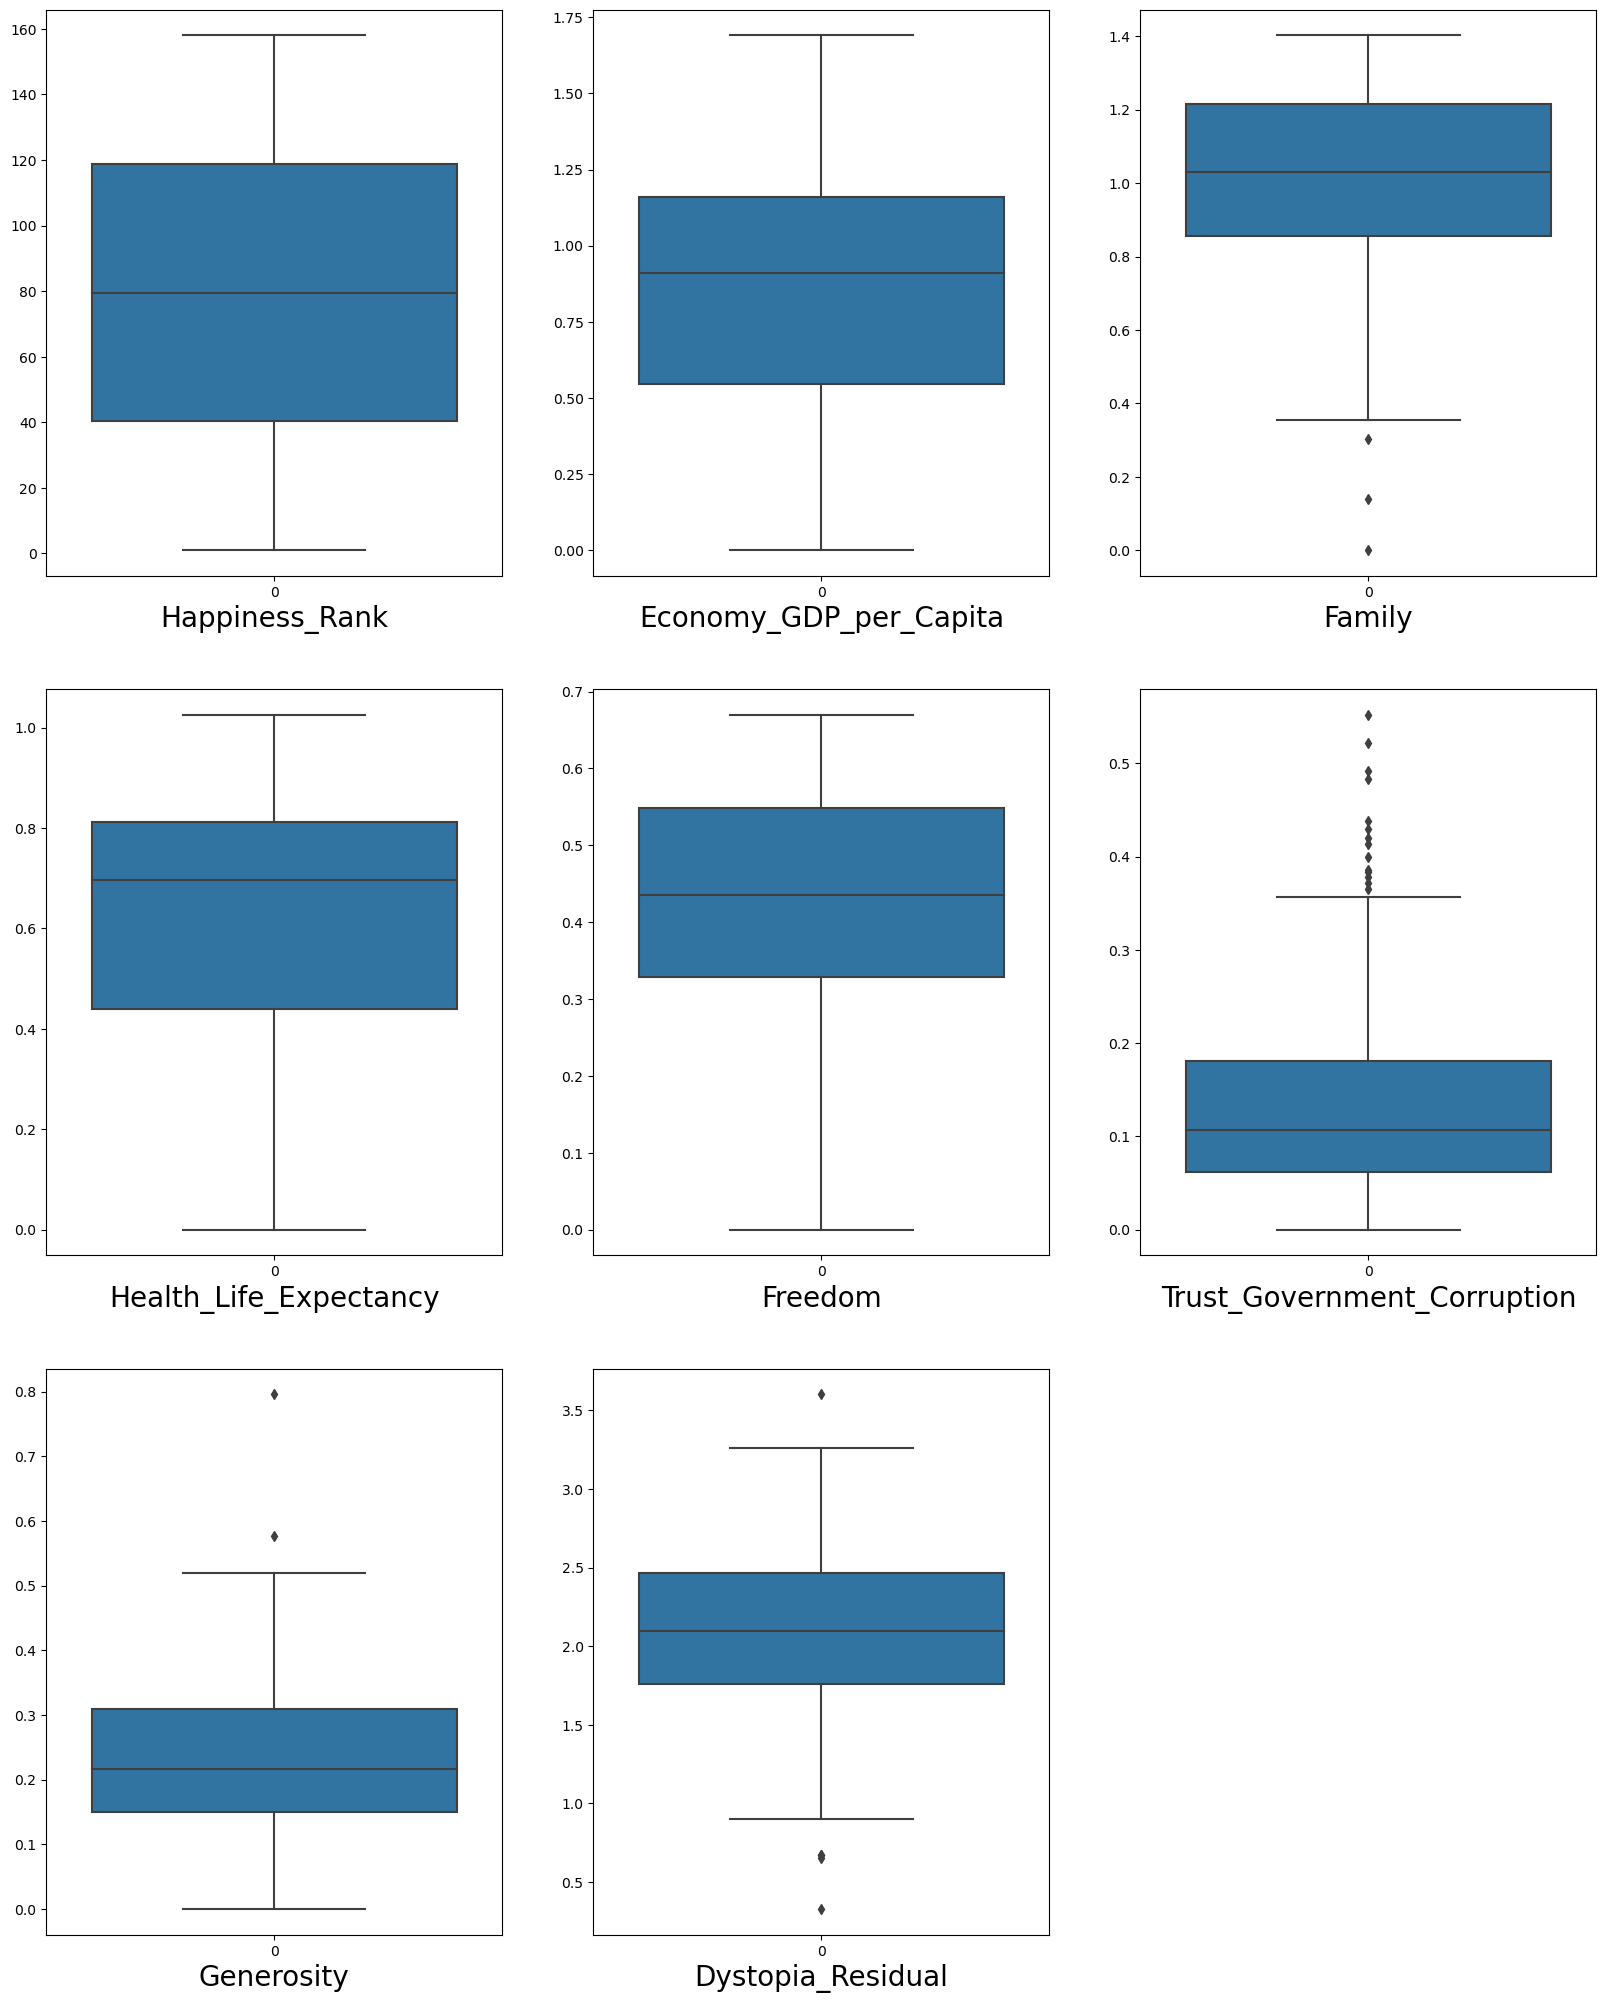

In [92]:
plt.figure(figsize=(20,25))
graph=1

for column in x:
    if graph<=9:
        plt.subplot(3,3,graph)
        sns.boxplot(data=x[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

Found outliers in family, trust_governement_corruption, generosity,Dystopia_residual

In [93]:
# find the  IQR (inter quantile range) to identify outliers

#1st quartile

q1=data.quantile(0.25)

#3rd quartie

q3=data.quantile(0.75)

#IQR

iqr=q3-q1

In [94]:
fmly_low=(q3.Family-(1.5*iqr.Family))
index=np.where(data['Family']<fmly_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(138, 12)


,index,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
134,148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
135,150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
136,151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [95]:

gen_error_high=(q3.Generosity+(1.5*iqr.Generosity))
index=np.where(data['Generosity']>gen_error_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(136, 12)


,index,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
132,148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
133,150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
134,151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [96]:
dys_low=(q3.Dystopia_Residual-(1.5*iqr.Dystopia_Residual))
index=np.where(data['Dystopia_Residual']<dys_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(126, 12)


,index,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
122,143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
123,148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
124,150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723


In [97]:
trust_high=(q3.Trust_Government_Corruption+(1.5*iqr.Trust_Government_Corruption))
index=np.where(data['Trust_Government_Corruption']>trust_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(115, 12)


,index,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
111,143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
112,148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
113,150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723


removed outliers

In [101]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Standardized values

In [102]:
# split the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

48    5.960
76    5.286
90    5.057
44    5.995
56    5.828
Name: Happiness_Score, dtype: float64

In [103]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [104]:
y_pred=regression.predict(x_test)

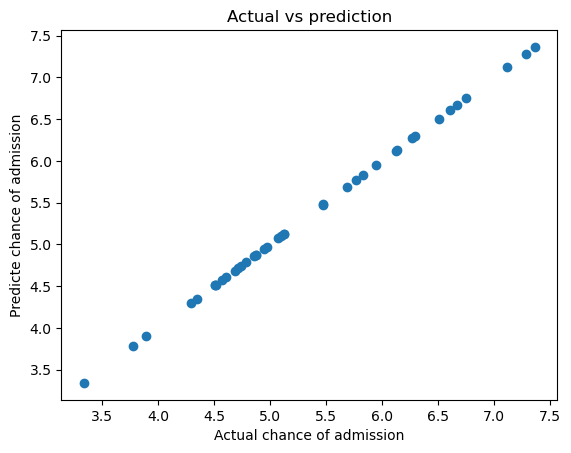

In [105]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicte chance of admission')
plt.title('Actual vs prediction')
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [107]:
y_pred=regression.predict(x_test)

In [108]:
mean_absolute_error(y_test,y_pred)

0.00025855952073022825

In [109]:
mean_squared_error(y_test,y_pred)

8.691784337748814e-08

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002948183226624291

In [111]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [112]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [113]:
alpha=lasscv.alpha_
alpha


0.0012252949302492804

In [114]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0012252949302492804)

In [115]:
lasso_reg.score(x_test,y_test)

0.9999745239546767

After regularization got 0.9999745239546767 score